In [85]:
import pandas as pd
import pickle
import requests
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import random
from scipy.spatial.distance import cosine

In [2]:
perturbagen_class = pickle.load(open("../data/all_perturbagen_class.pkl", "rb"))
perturbagens = list(perturbagen_class.keys())

In [3]:
df = pd.read_csv("../data/full_geneexp_phase2_1004.csv")
def getcellline(x):
    cellline = x.split("_")[1]
    return cellline
df['celline'] = df['signature'].apply(getcellline)

In [4]:
df["atc_level_one"] = [val[0] for val in list(df["atc"])]
imp_columns = ['target', 'atc', 'celline', 'atc_level_one']+list(df.columns[7:985])
df = df[imp_columns]

In [5]:
df.head()

,target,atc,celline,atc_level_one,780,7849,6193,23,9552,387,...,54681,11000,6915,6253,7264,5467,2767,23038,57048,79716
0,BRD-K70330367,N04BB01,YAPC,N,-1.153825,-0.050292,-0.517787,0.244794,-0.399110,0.317308,...,0.440725,0.115513,-0.282635,0.666874,-0.319930,-0.131123,-0.213662,-1.007887,-0.182830,0.524592
1,BRD-K70330367,N04BB01,YAPC,N,-0.150379,0.557618,-0.106715,-0.680913,-0.356638,0.821385,...,-0.017656,2.434079,-0.580103,-0.610206,0.188383,-0.309202,0.056737,-0.003205,-0.434692,-0.177766
2,BRD-K70330367,N04BB01,HA1E,N,0.038450,0.620755,-0.324466,0.136990,0.141210,-0.112033,...,0.224989,0.076725,-0.925917,0.711872,-0.341481,0.437485,-0.052817,-0.376699,-0.047295,-0.215700
3,BRD-K70330367,N04BB01,PC3,N,2.363550,-0.061650,0.691550,0.524950,-0.593000,0.109150,...,0.212650,0.114100,-0.307550,-1.156950,0.508250,-0.230200,-0.314000,-1.208450,-0.630500,-0.447650
4,BRD-K70330367,N04BB01,PC3,N,-0.512800,-0.442350,0.697400,0.108150,-0.552350,0.938150,...,0.358500,-0.641800,-0.603150,-0.792450,0.384800,-0.458000,-0.074800,-0.196750,-0.669750,0.074850


In [6]:
atc_level_vals = np.unique(df.atc_level_one)
cell_lines = [k for k,_ in Counter(df.celline).most_common(7)]

### Variance of expression within cell line per ATC value

In [90]:
variance_dict = {}
for atc_val in atc_level_vals:
    all_variance = []
    for cell_line in cell_lines:
        df_subset = df[np.logical_and(df.atc_level_one==atc_val, df.celline==cell_line)]
        variance = list(df_subset[df_subset.columns[4:]].var())
        
        all_variance.append(variance)
    variance_dict[atc_val] = all_variance


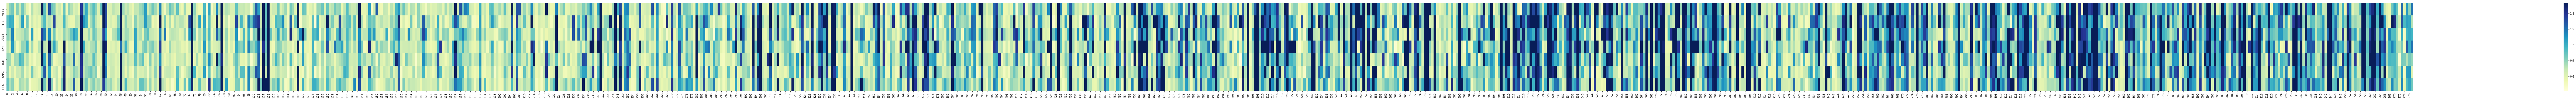

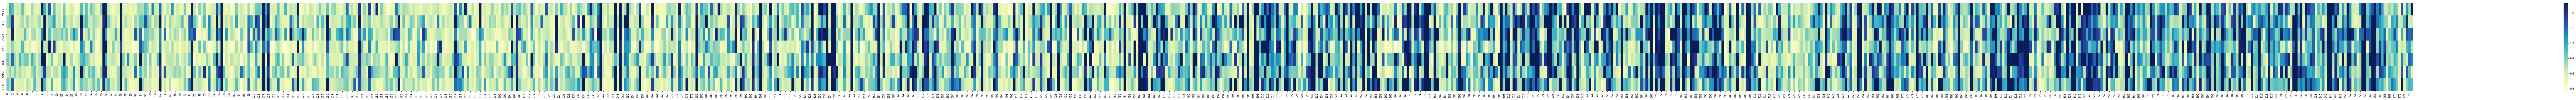

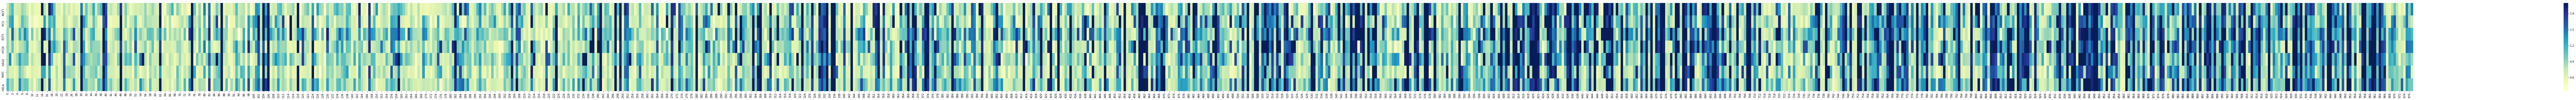

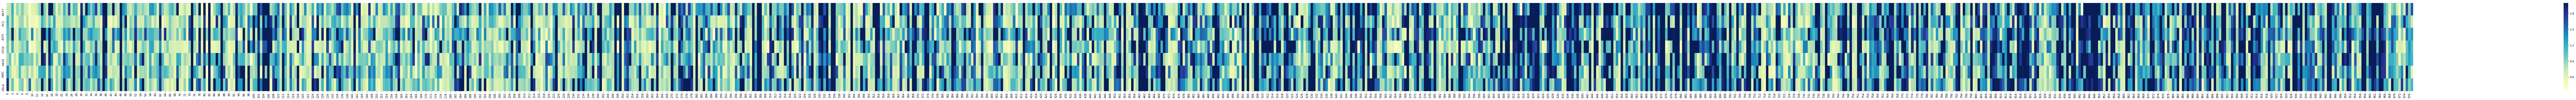

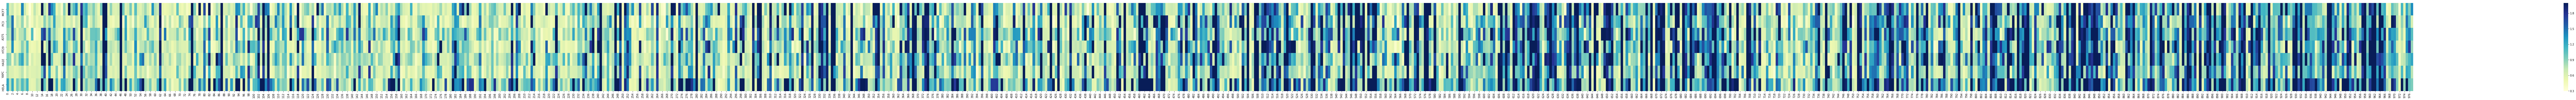

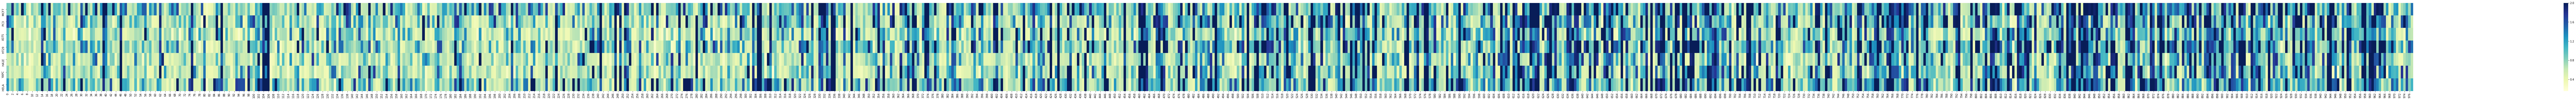

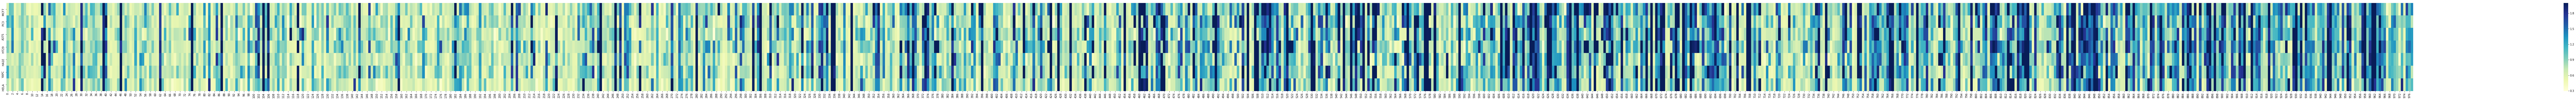

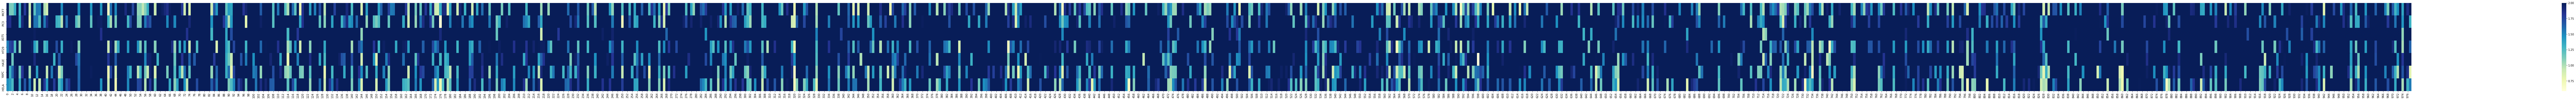

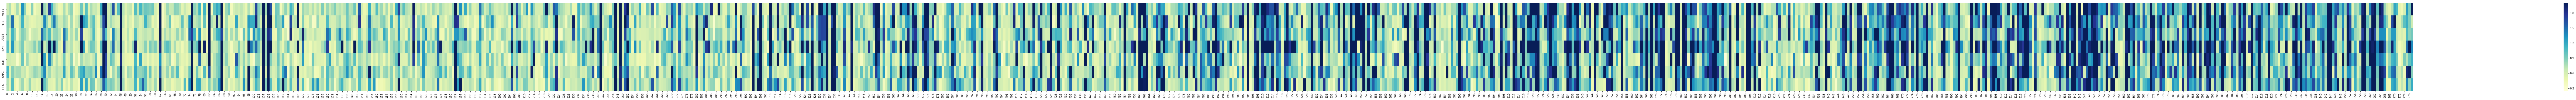

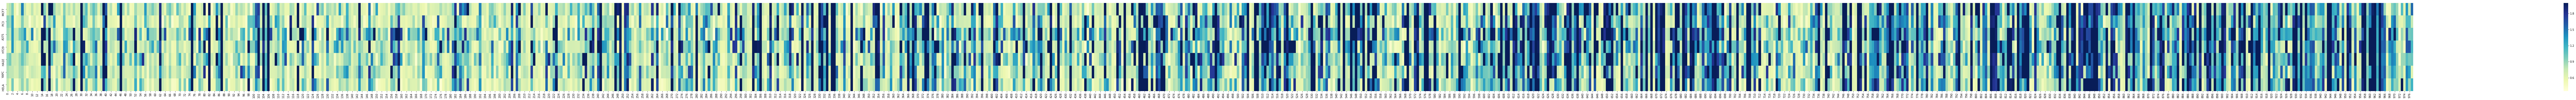

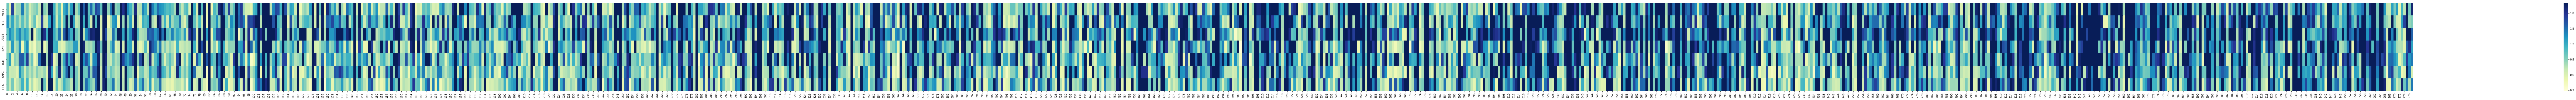

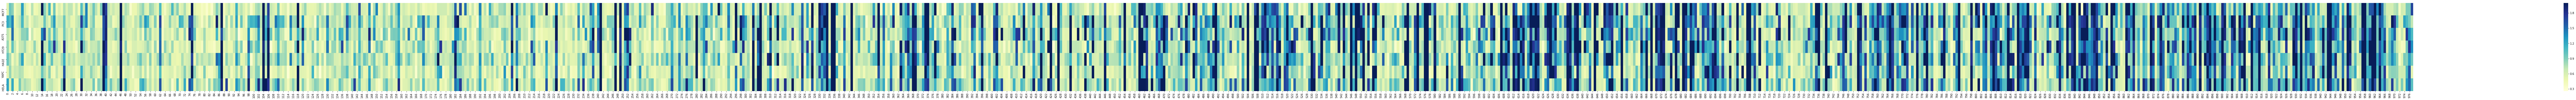

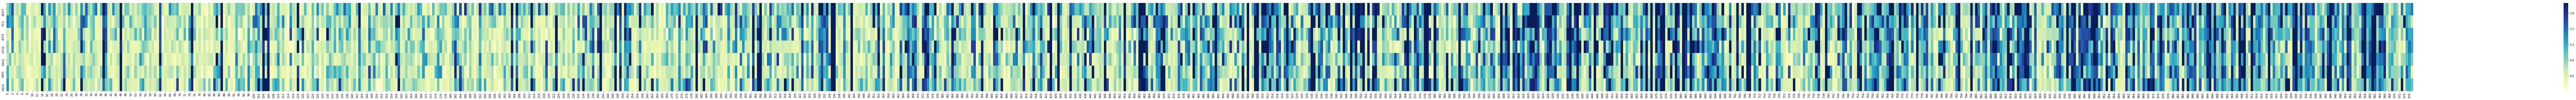

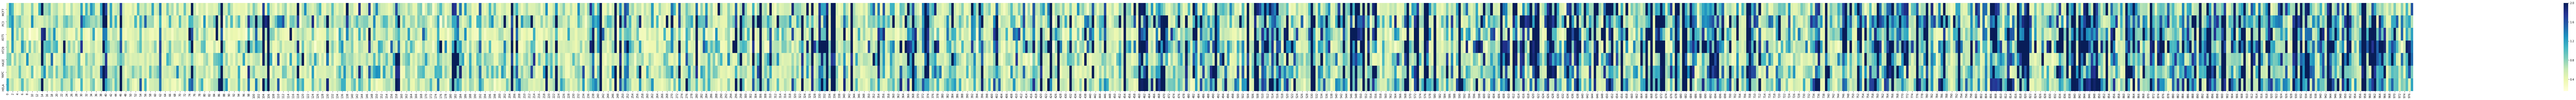

In [100]:
for atc_val in variance_dict.keys():
    plt.figure(figsize=(200, 6))
    sns.heatmap(variance_dict[atc_val], cmap='YlGnBu', yticklabels=cell_lines, vmax='2')

### Checking by cumulative of sorted similarities

In [84]:
level_one = np.array(df['atc_level_one'])
target = np.array(df['target'])
df_celline = np.array(df['celline'])
gene_exp = np.array(df[df.columns[4:]])
greater_than = gene_exp>=0

binary_gene_exp = gene_exp*0+greater_than



In [86]:
def binary_similarity_fun(a, b):
    a = np.array(list(a))
    b = np.array(list(b))
    
    return np.sum(np.equal(a, b))/a.shape[0]

def nb_similarity_fun(a, b):
    return cosine(a, b)

In [87]:
def checkQuantile(testGene, companionGenes, level_one, testGeneTarget, cell_line, similarity_fun):
    similarity = [similarity_fun(testGene, companionGene) for companionGene in companionGenes]
    sim_tar = list(zip(similarity, level_one))
    sim_tar.sort(reverse=True)
    sorted_tar = np.array([target for _, target in sim_tar])
    bool_tar = sorted_tar==testGeneTarget
    total = bool_tar.sum()
    tar_cumul = np.cumsum(bool_tar)/total
    plt.plot(range(0, len(tar_cumul)), tar_cumul)
    plt.title(testGeneTarget+"_"+cell_line)
    plt.show()

### Binary Gene Expressions

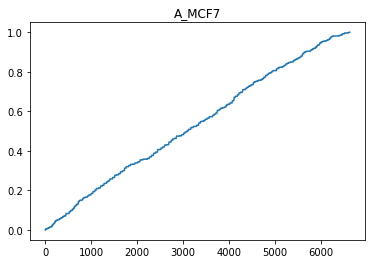

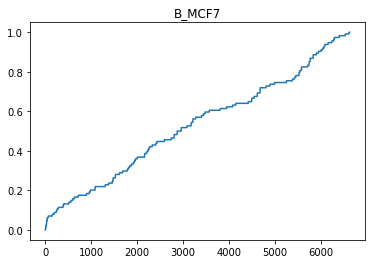

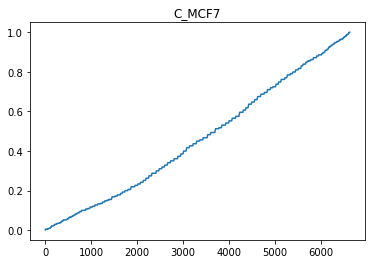

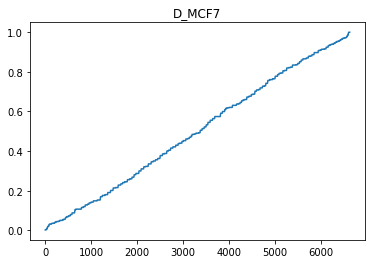

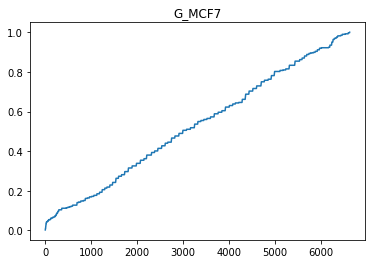

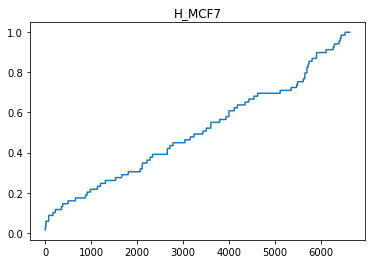

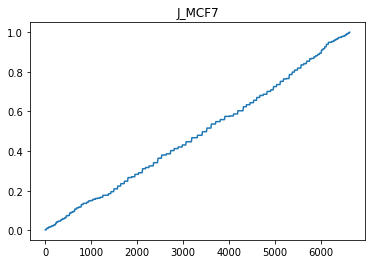

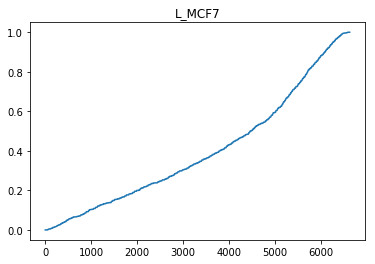

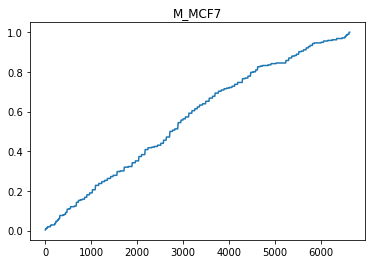

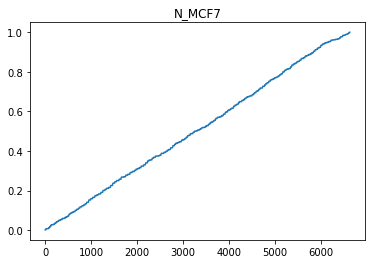

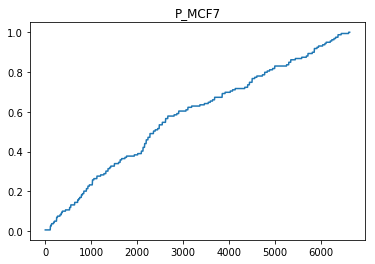

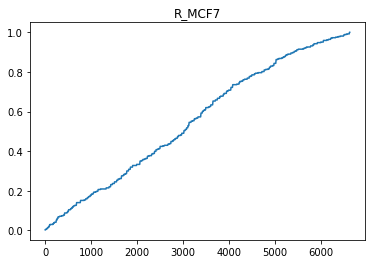

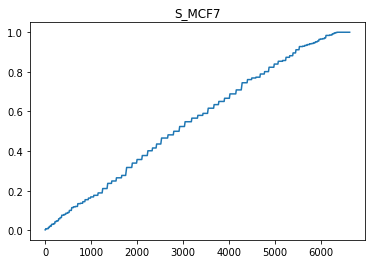

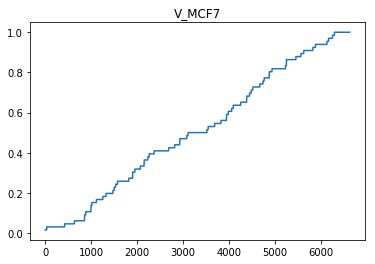

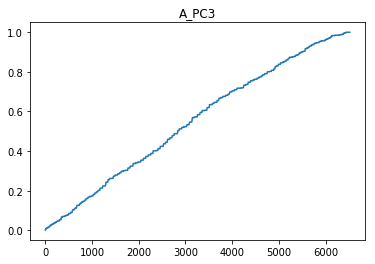

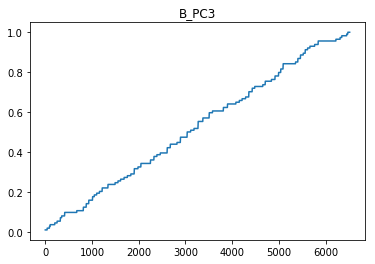

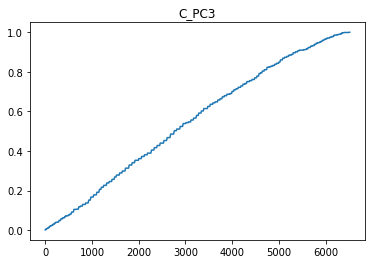

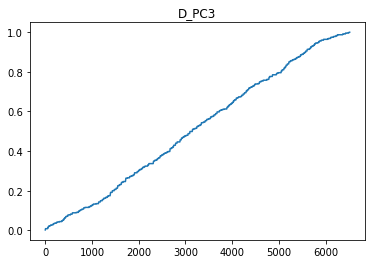

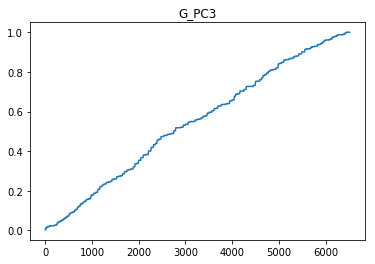

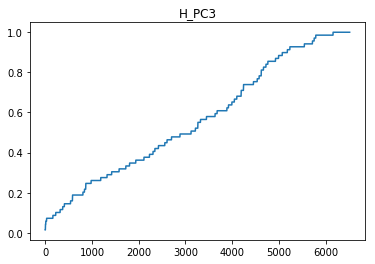

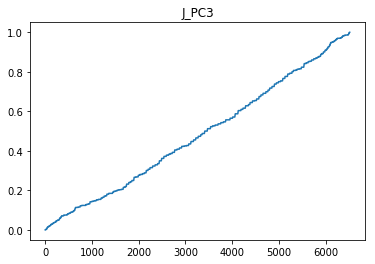

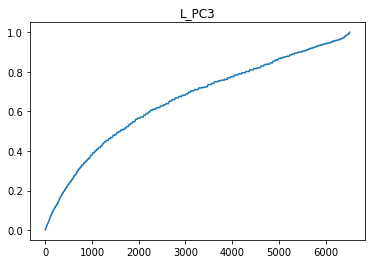

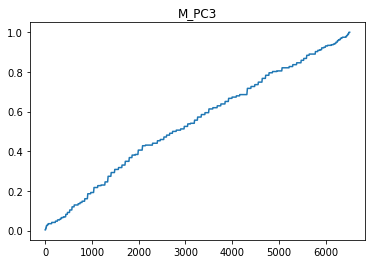

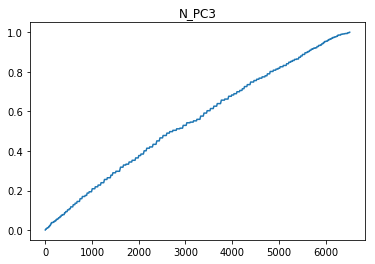

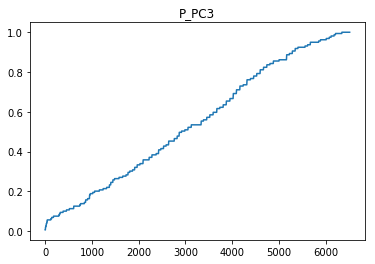

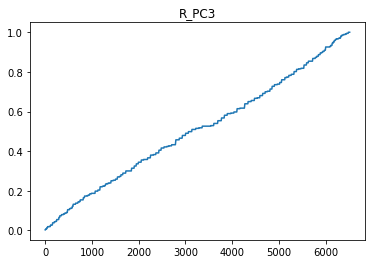

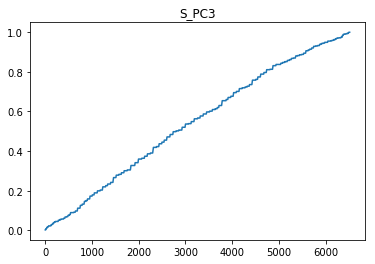

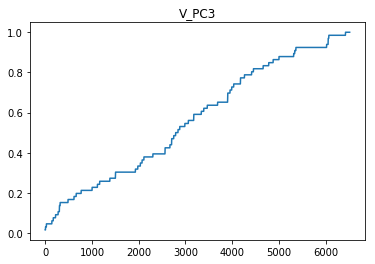

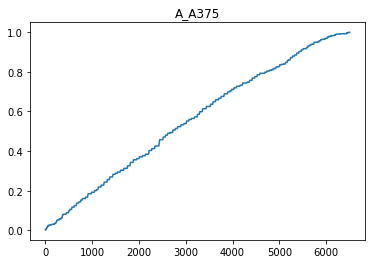

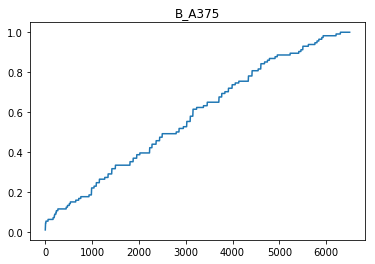

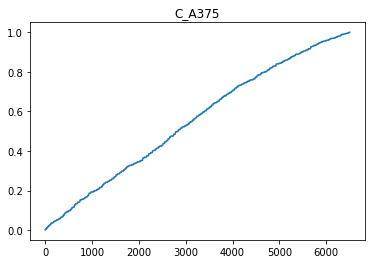

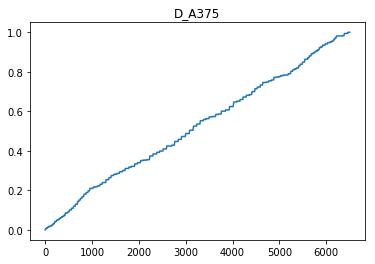

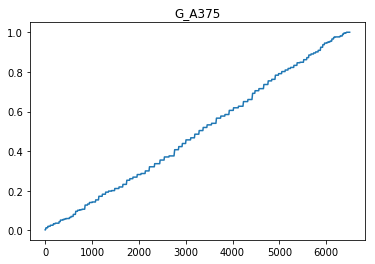

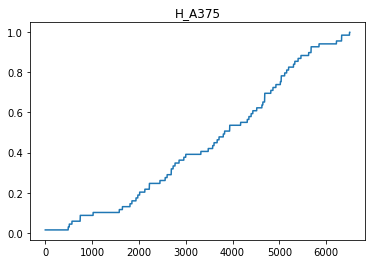

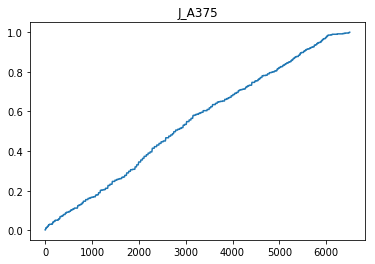

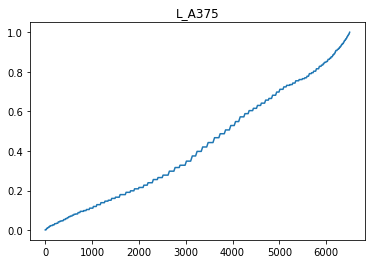

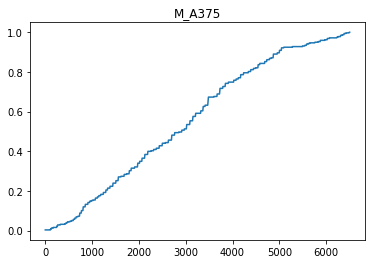

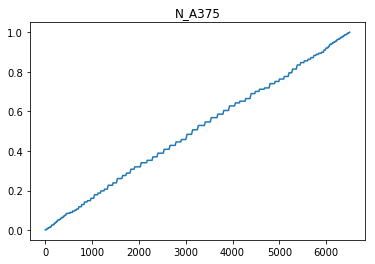

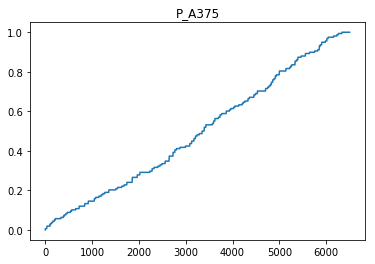

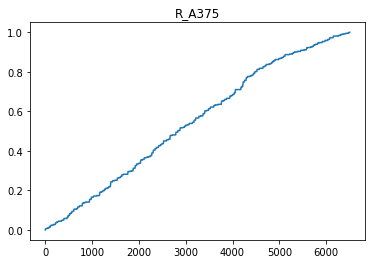

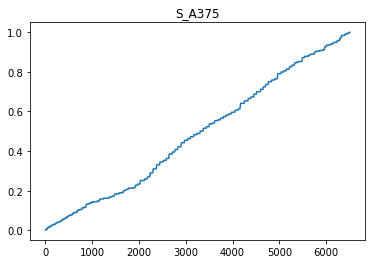

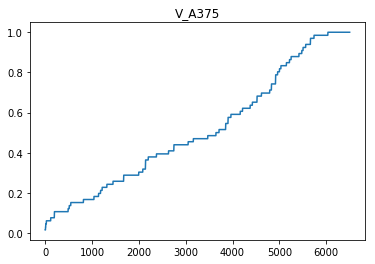

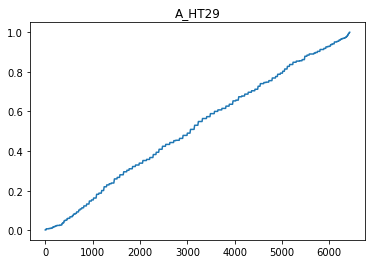

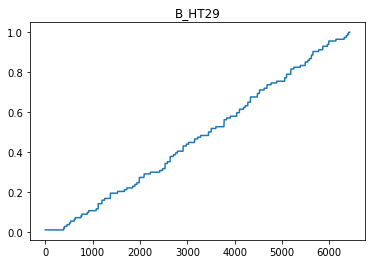

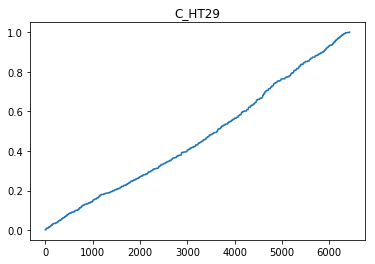

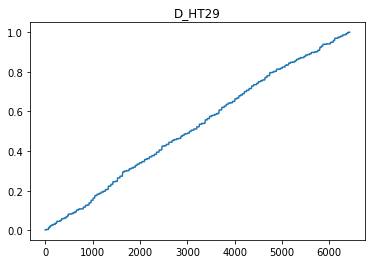

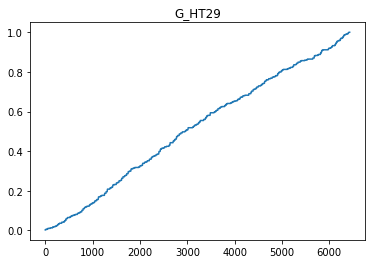

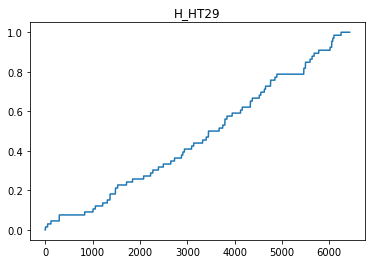

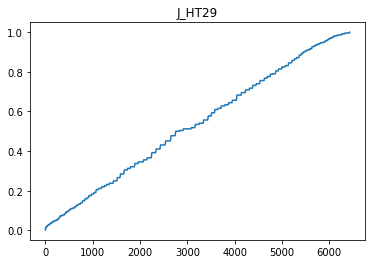

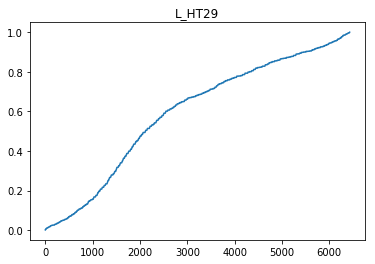

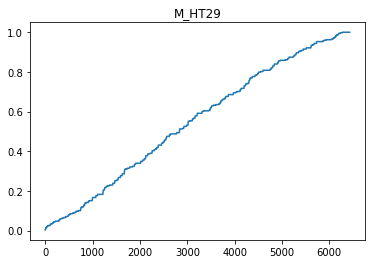

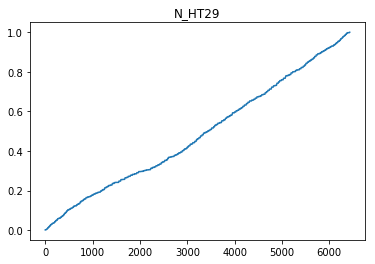

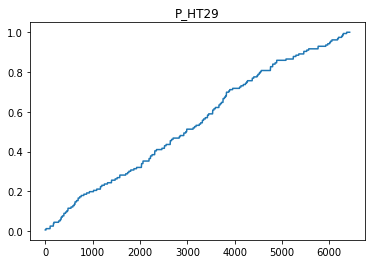

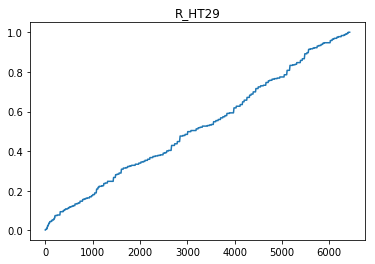

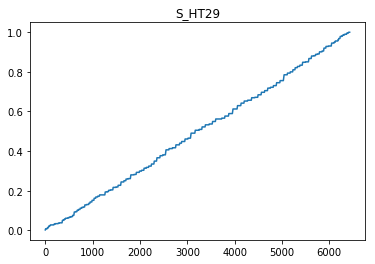

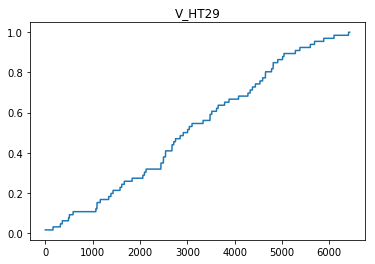

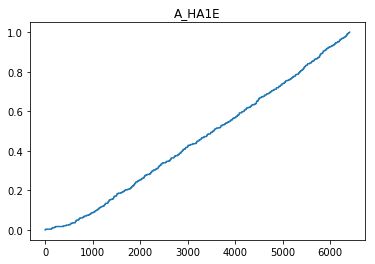

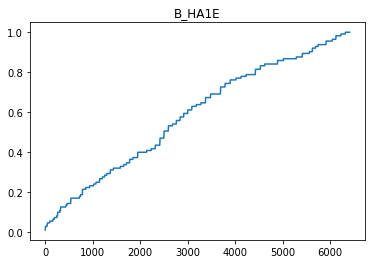

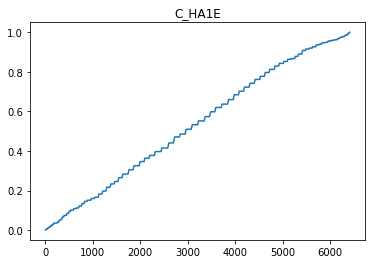

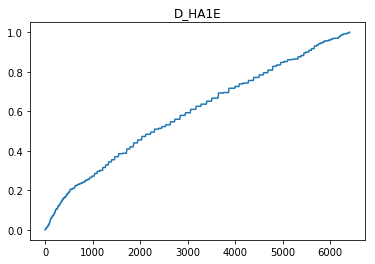

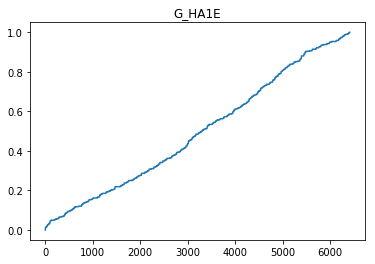

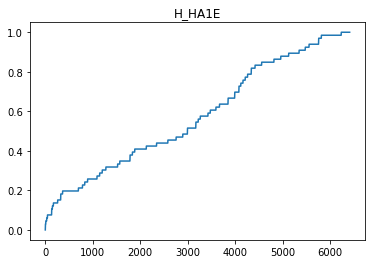

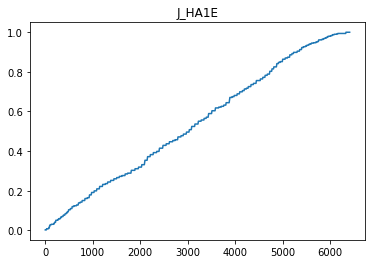

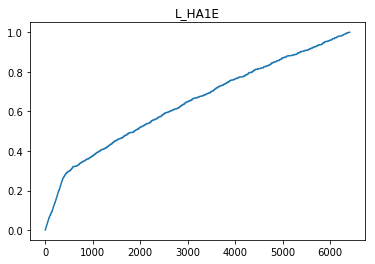

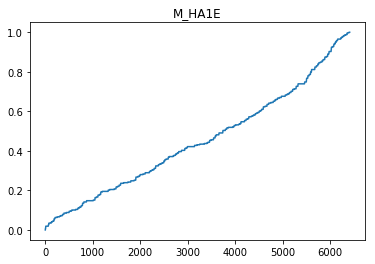

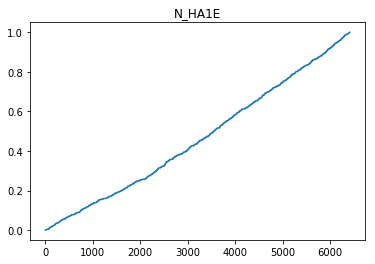

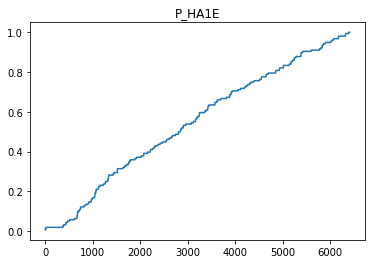

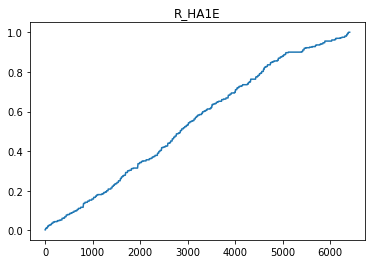

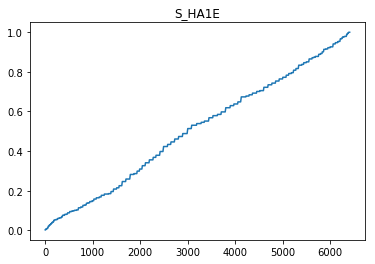

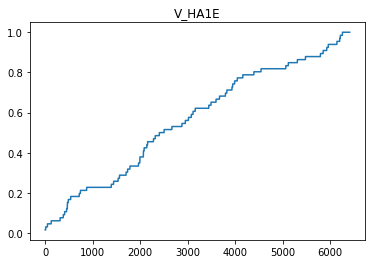

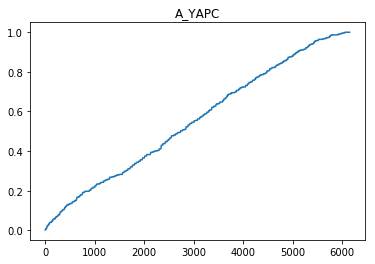

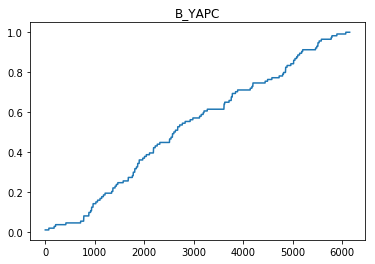

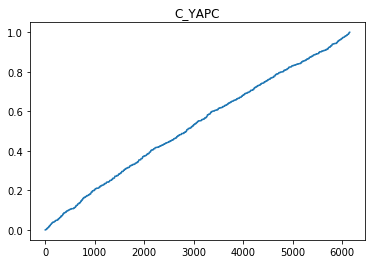

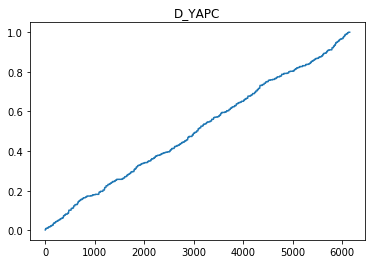

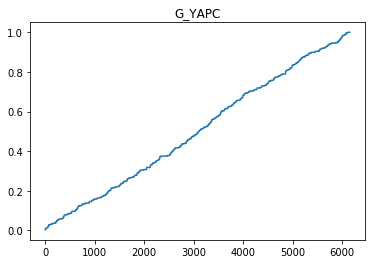

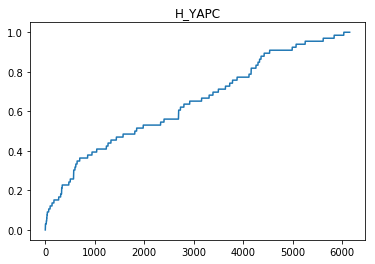

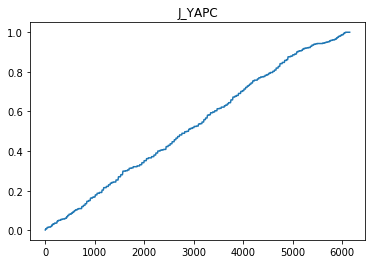

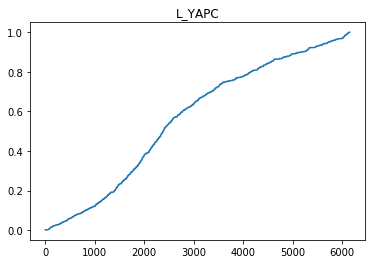

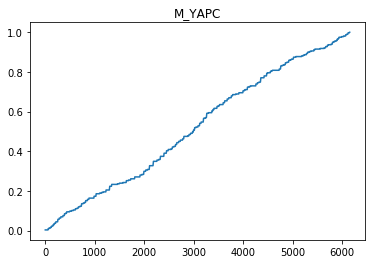

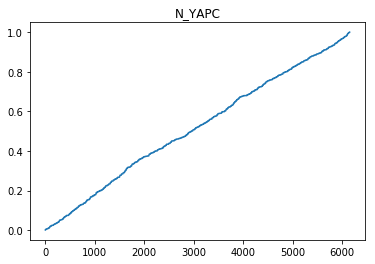

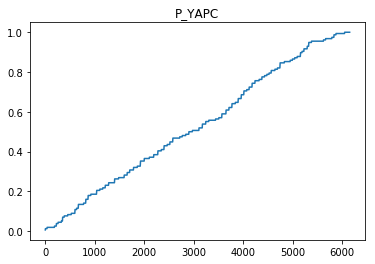

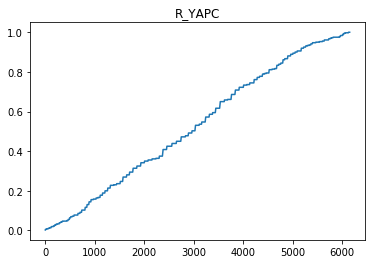

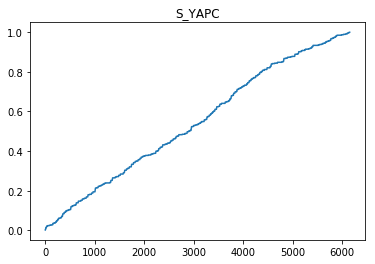

IndexError: index 6150 is out of bounds for axis 0 with size 6150

In [91]:
for cell_line in cell_lines:
    df_subset = binary_gene_exp[df_celline==cell_line]
    for val in atc_level_vals:
        x = random.randint(0, len(df_subset)-1)
        while True:
            if level_one[df_celline==cell_line][x]==val:
                break
            x = random.randint(0, len(df_subset)-1)
        sim = checkQuantile(df_subset[x], df_subset, level_one[df_celline==cell_line], 
                            level_one[df_celline==cell_line][x], cell_line, binary_similarity_fun)

### Non Binary Gene Expressions

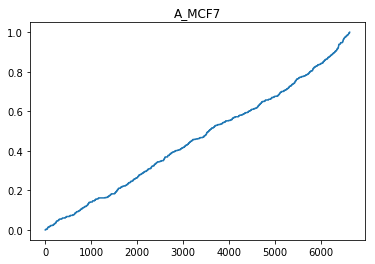

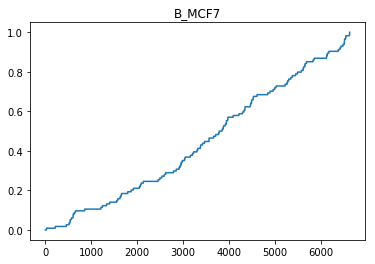

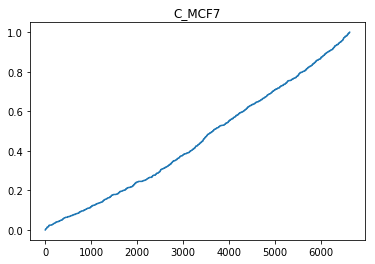

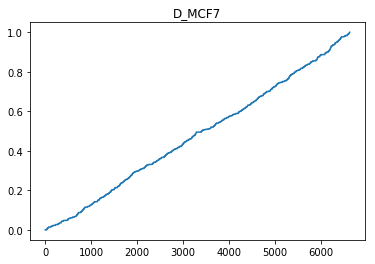

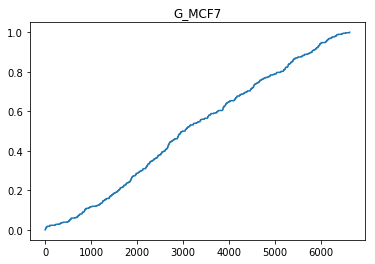

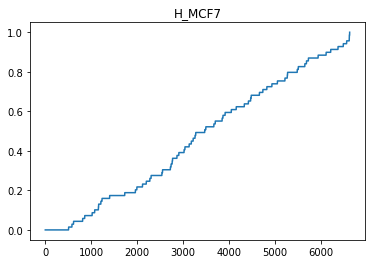

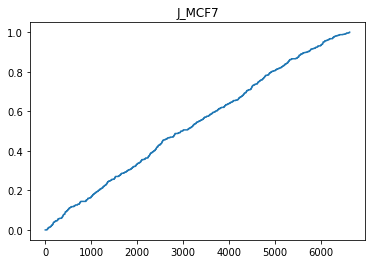

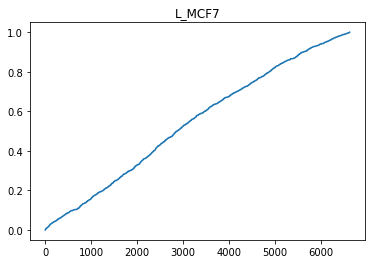

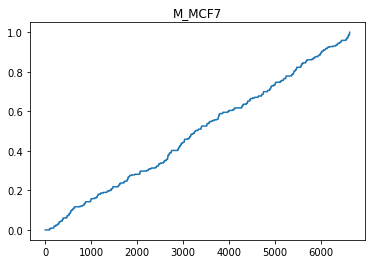

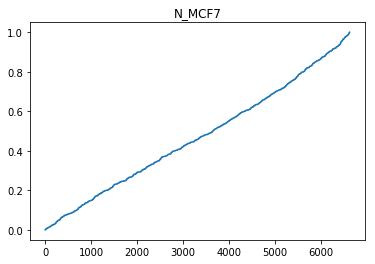

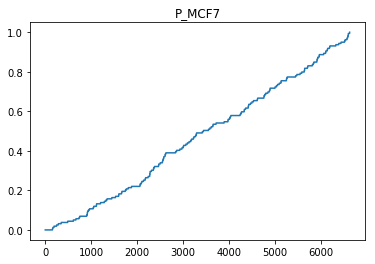

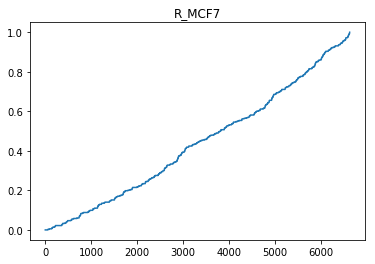

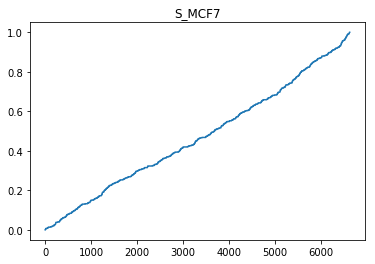

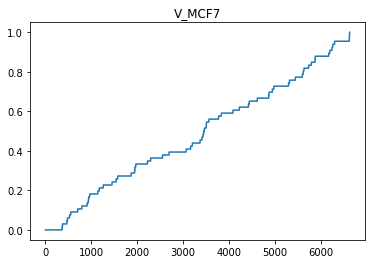

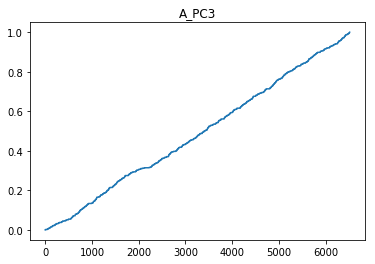

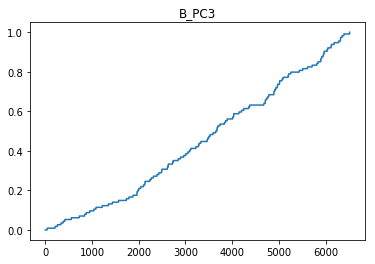

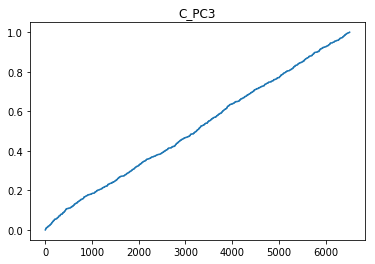

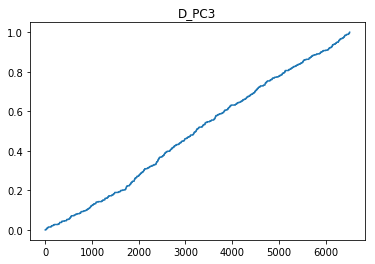

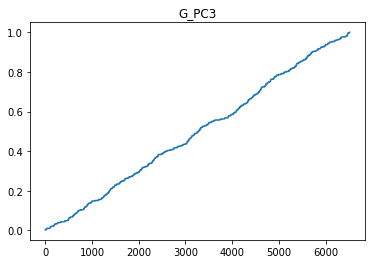

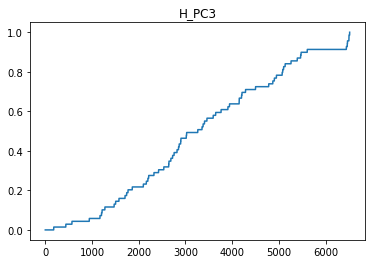

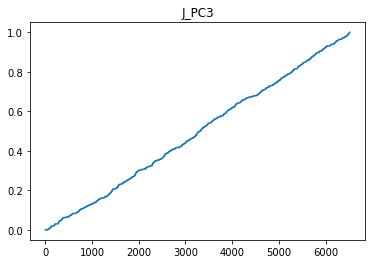

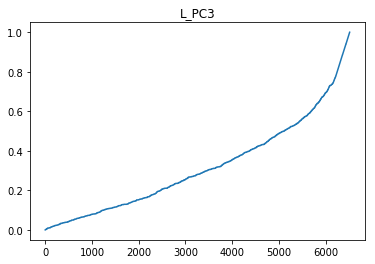

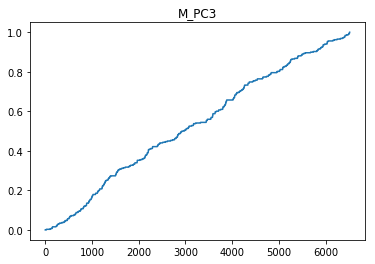

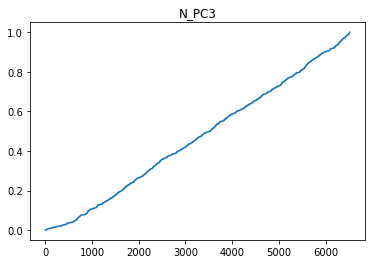

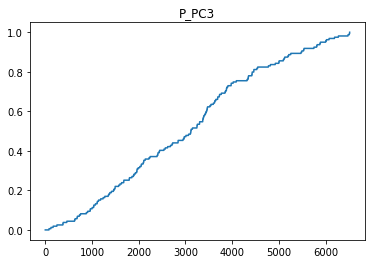

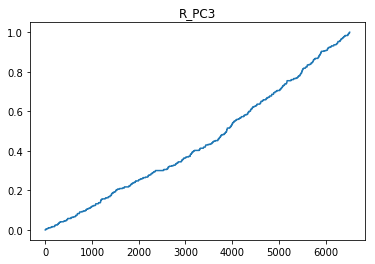

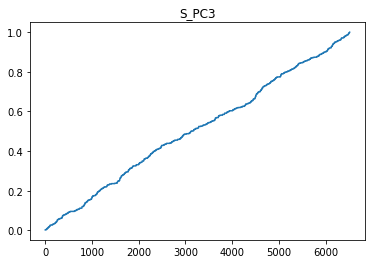

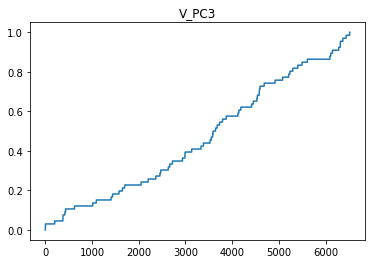

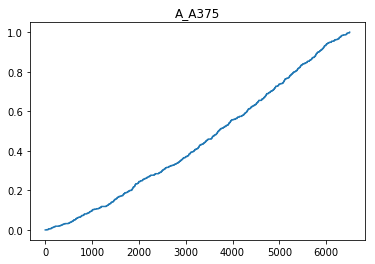

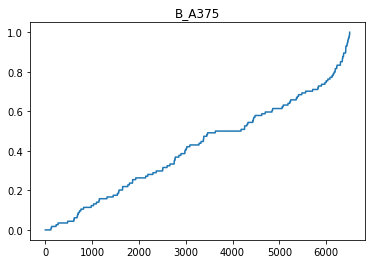

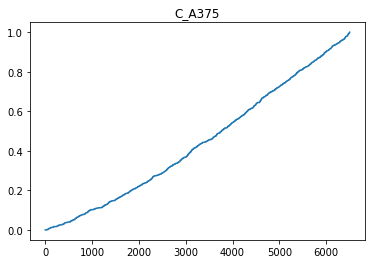

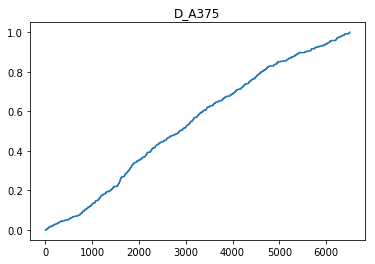

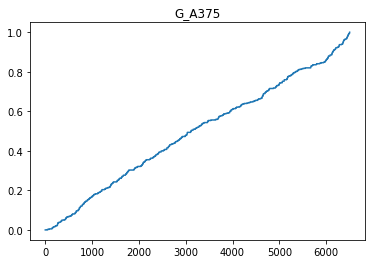

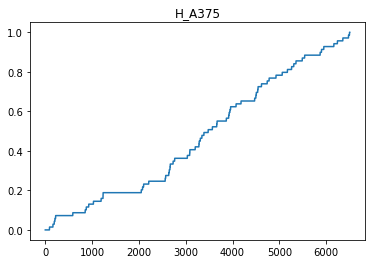

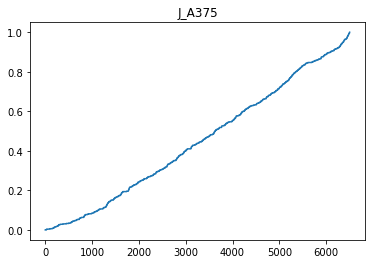

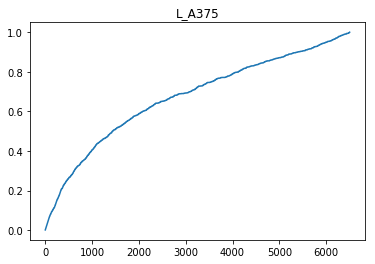

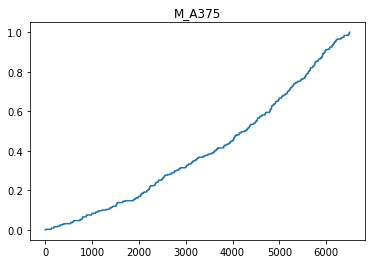

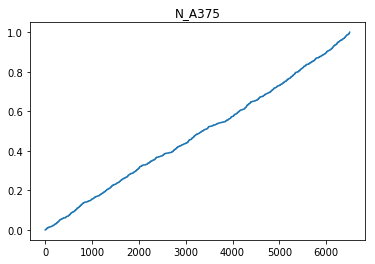

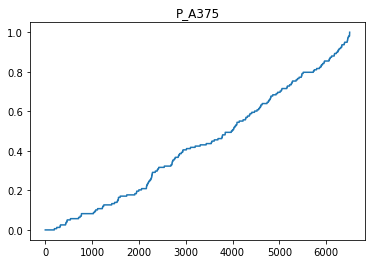

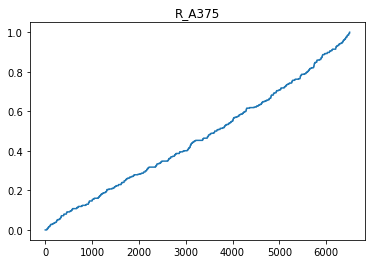

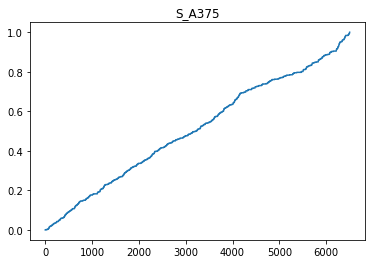

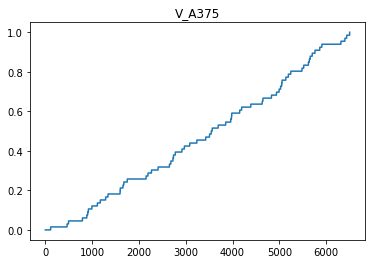

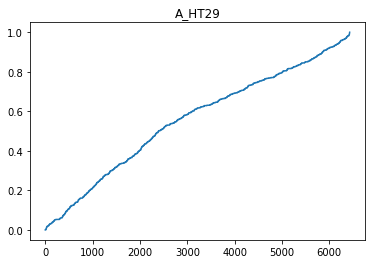

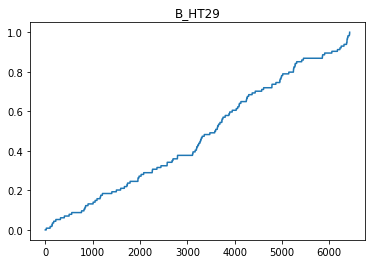

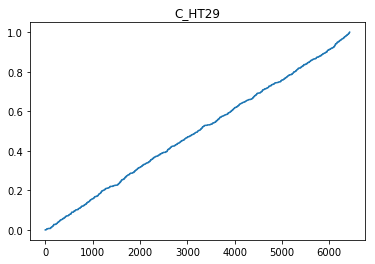

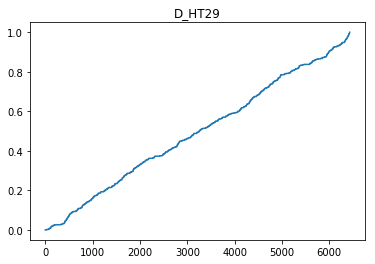

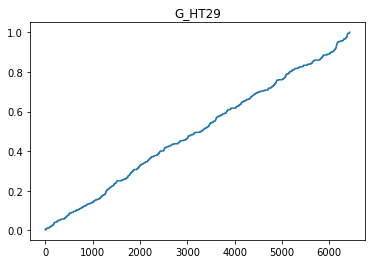

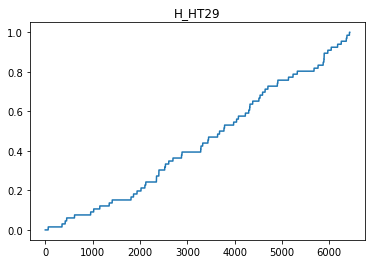

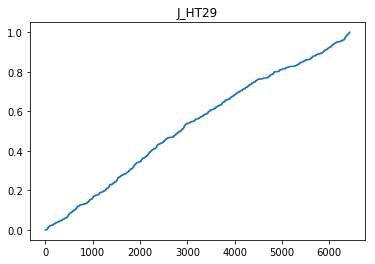

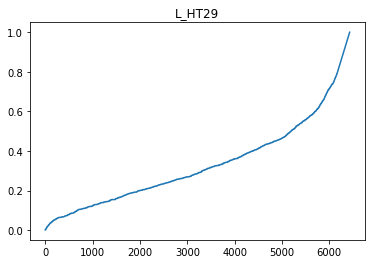

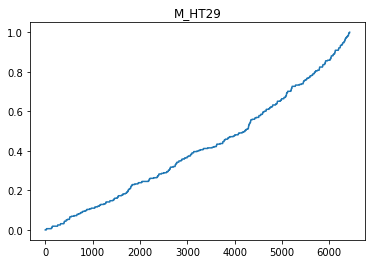

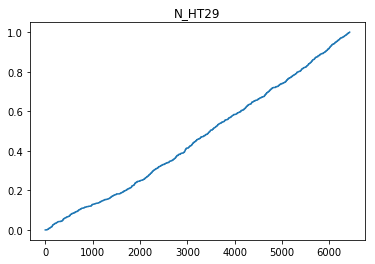

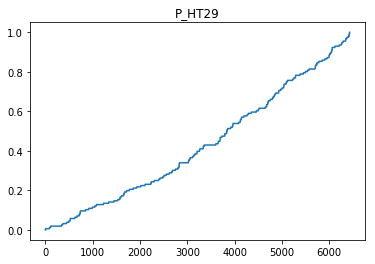

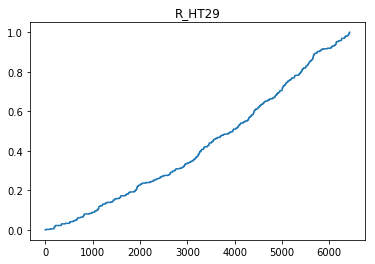

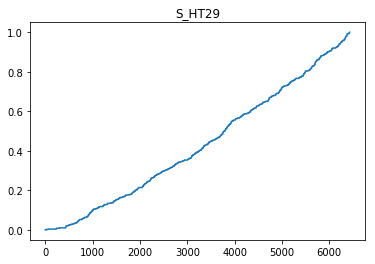

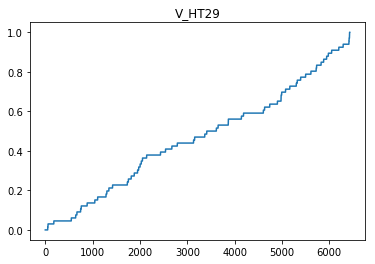

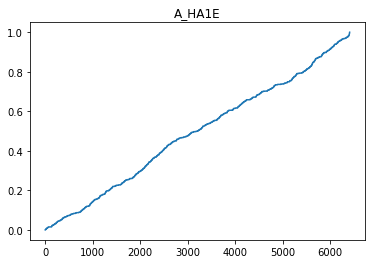

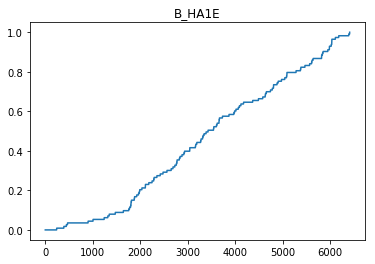

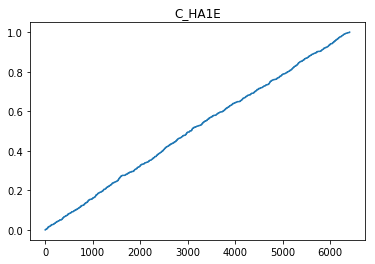

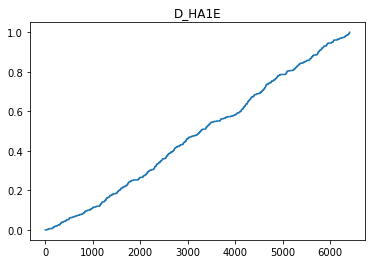

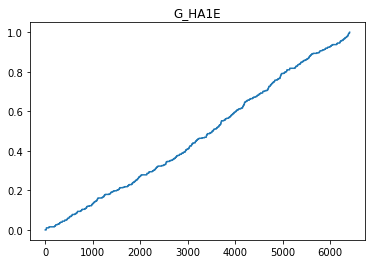

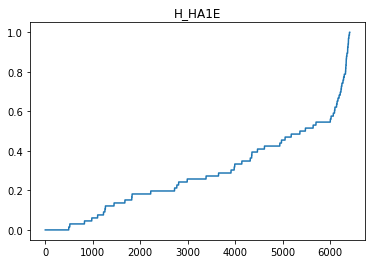

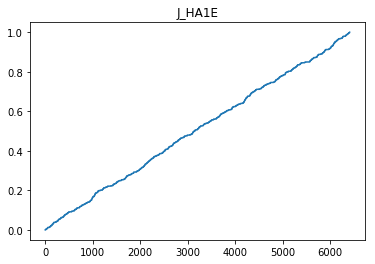

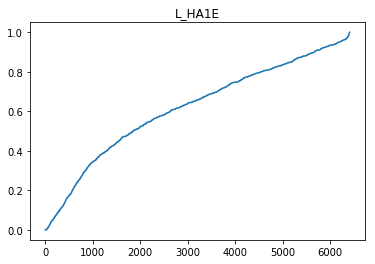

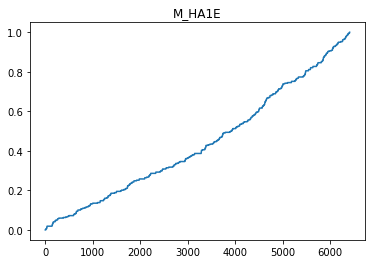

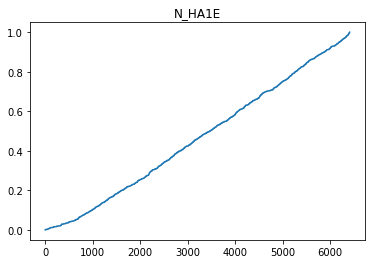

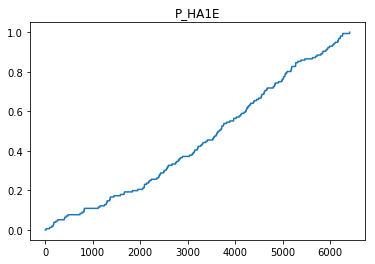

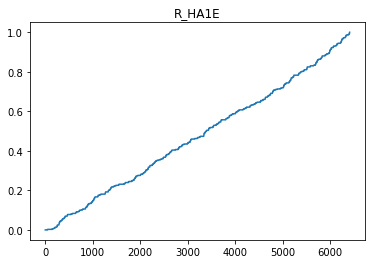

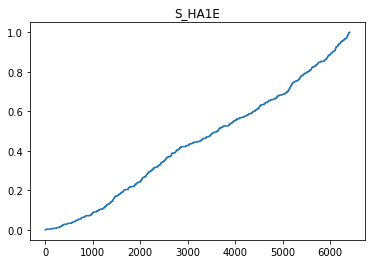

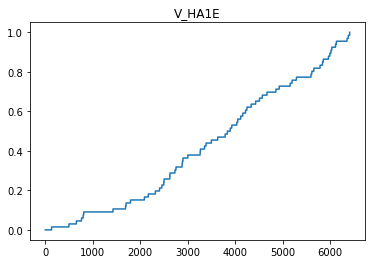

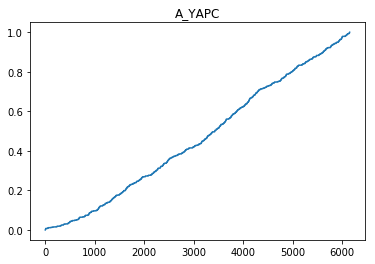

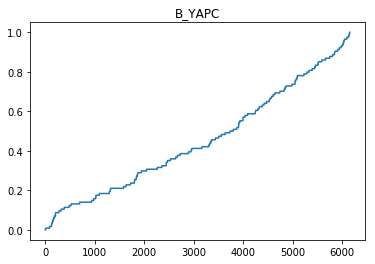

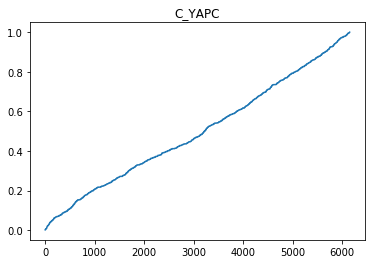

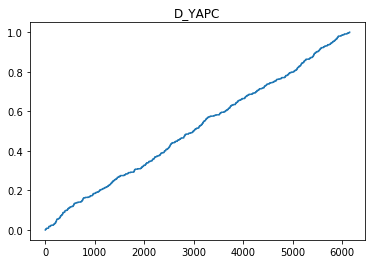

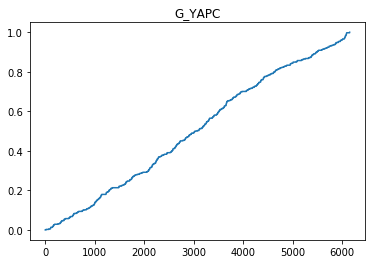

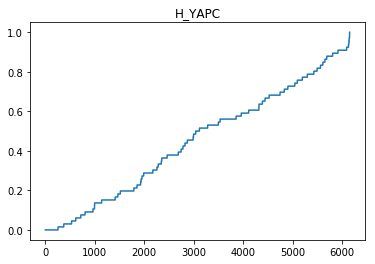

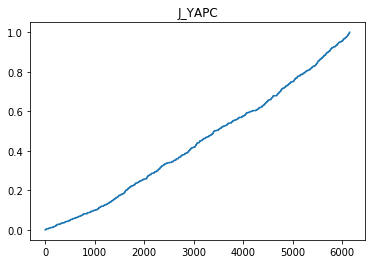

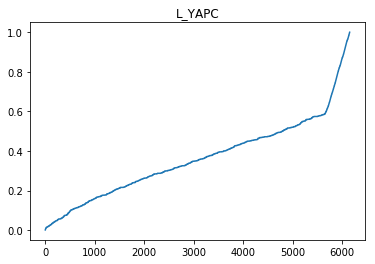

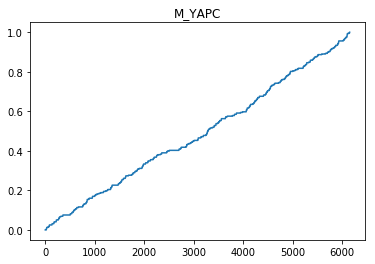

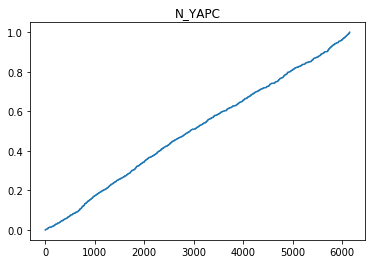

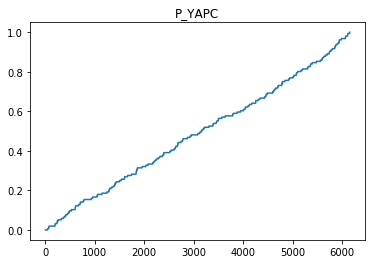

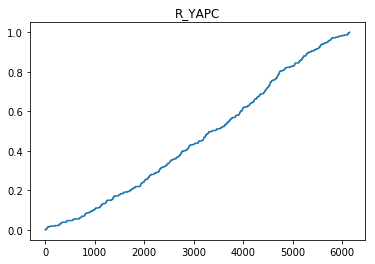

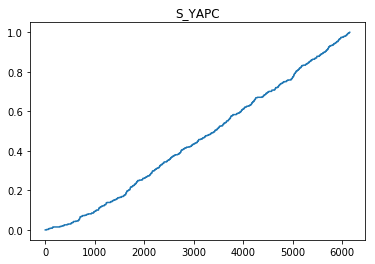

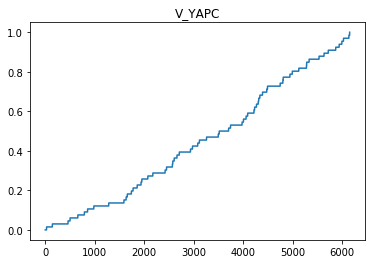

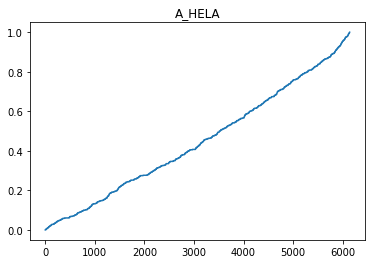

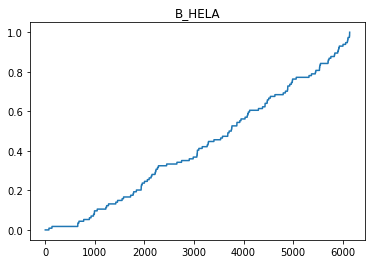

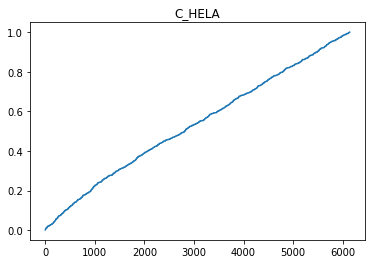

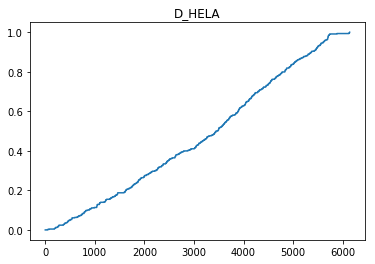

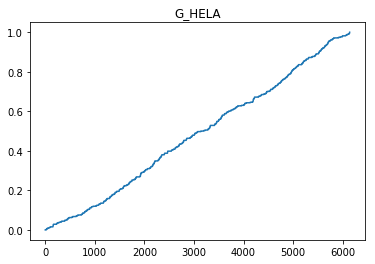

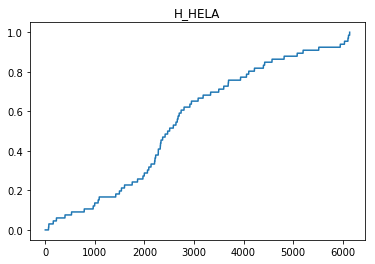

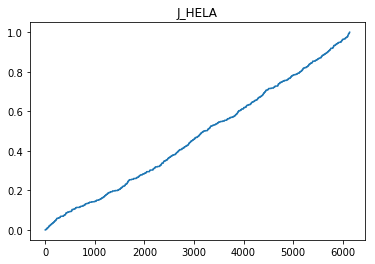

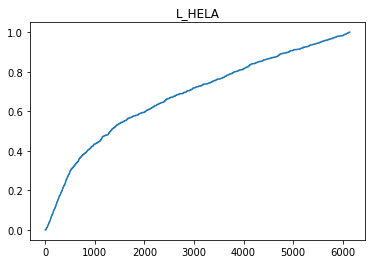

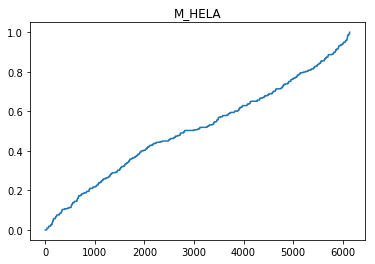

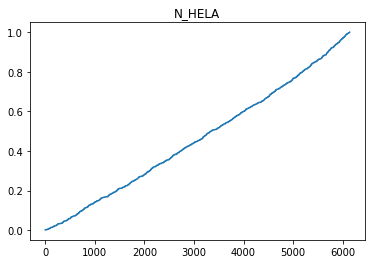

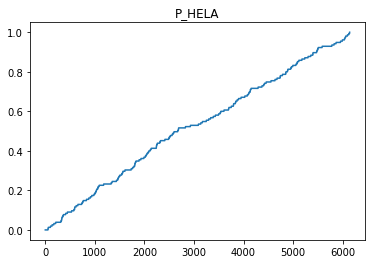

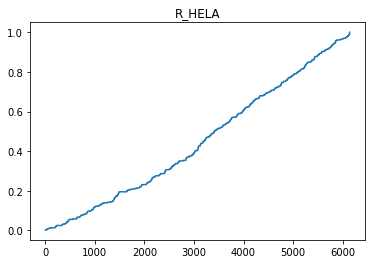

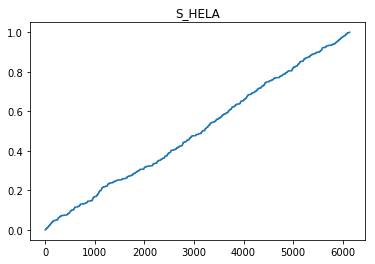

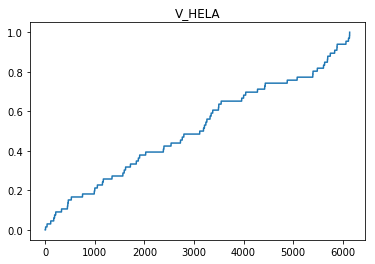

In [94]:
for cell_line in cell_lines:
    df_subset = gene_exp[df_celline==cell_line]
    for val in atc_level_vals:
        x = random.randint(0, len(df_subset)-1)
        while True:
            if level_one[df_celline==cell_line][x]==val:
                break
            x = random.randint(0, len(df_subset)-1)
        sim = checkQuantile(df_subset[x], df_subset, level_one[df_celline==cell_line], 
                            level_one[df_celline==cell_line][x], cell_line, nb_similarity_fun)

0